In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/liyuhao413/filepit/main/world-data-2023.csv'
df = pd.read_csv(url)
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [2]:
missing_values = df.isnull().sum()
print(missing_values)

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [3]:
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
                      'Out of pocket health expenditure', 'Physicians per thousand',
                      'Population', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [4]:
columns_with_missing = df.columns[df.isnull().any()]

numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

In [6]:
columns_to_drop = ['Abbreviation', 'Calling Code', 'Capital/Major City',
                   'Currency-Code', 'Largest city', 'Official language']

df = df.drop(columns=columns_to_drop)

df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,58.1,652230.0,323000.000000,32.49,8672.0,149.900000,2.300000,4.47,...,78.4,0.28,38041754.0,48.900000,9.300000,71.400000,11.120000,9797273.0,33.939110,67.709953
1,Albania,105.0,43.1,28748.0,9000.000000,11.78,4536.0,119.050000,1.400000,1.62,...,56.9,1.20,2854191.0,55.700000,18.600000,36.600000,12.330000,1747593.0,41.153332,20.168331
2,Algeria,18.0,17.4,2381741.0,317000.000000,24.28,150006.0,151.360000,2.000000,3.02,...,28.1,1.72,43053054.0,41.200000,37.200000,66.100000,11.700000,31510100.0,28.033886,1.659626
3,Andorra,164.0,40.0,468.0,159274.853801,7.20,469.0,190.460955,6.722346,1.27,...,36.4,3.33,77142.0,62.738068,16.573964,40.822404,6.886364,67873.0,42.506285,1.521801
4,Angola,26.0,47.5,1246700.0,117000.000000,40.73,34693.0,261.730000,17.100000,5.52,...,33.4,0.21,31825295.0,77.500000,9.200000,49.100000,6.890000,21061025.0,-11.202692,17.873887


In [7]:
summary = df.describe()
print(summary)

       Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        195.000000             195.000000    1.950000e+02   
mean         356.764103              39.117553    6.896244e+05   
std         1982.888967              21.386448    1.916650e+06   
min            2.000000               0.600000    0.000000e+00   
25%           35.500000              22.650000    2.445650e+04   
50%           89.000000              39.200000    1.205380e+05   
75%          216.500000              54.850000    5.541675e+05   
max        26337.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Co2-Emissions          CPI  \
count       1.950000e+02  195.000000   1.950000e+02   195.000000   
mean        1.592749e+05   20.214974   1.777992e+05   190.460955   
std         3.563077e+05    9.790765   8.235184e+05   380.111858   
min         0.000000e+00    5.900000   1.100000e+01    99.030000   
25%         1.250000e+04   11.450000   2.625500e+03   114.470000 

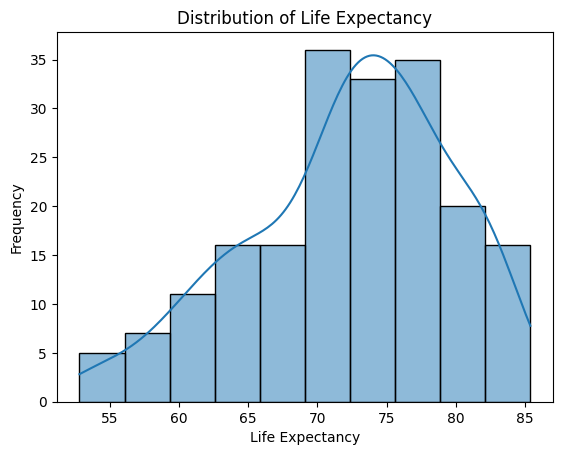

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Life expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

In [9]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

life_expectancy_correlations = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlations)

Life expectancy                              1.000000
Gross tertiary education enrollment (%)      0.714287
Physicians per thousand                      0.675590
Minimum wage                                 0.496110
Latitude                                     0.460774
Tax revenue (%)                              0.340034
Gasoline Price                               0.232206
GDP                                          0.175621
Co2-Emissions                                0.120824
Gross primary education enrollment (%)       0.094350
Armed Forces size                            0.074123
Urban_population                             0.070414
Density\n(P/Km2)                             0.055198
Land Area(Km2)                               0.054791
Population                                   0.008804
Forested Area (%)                            0.005831
Unemployment rate                           -0.039321
Longitude                                   -0.070463
CPI Change (%)              

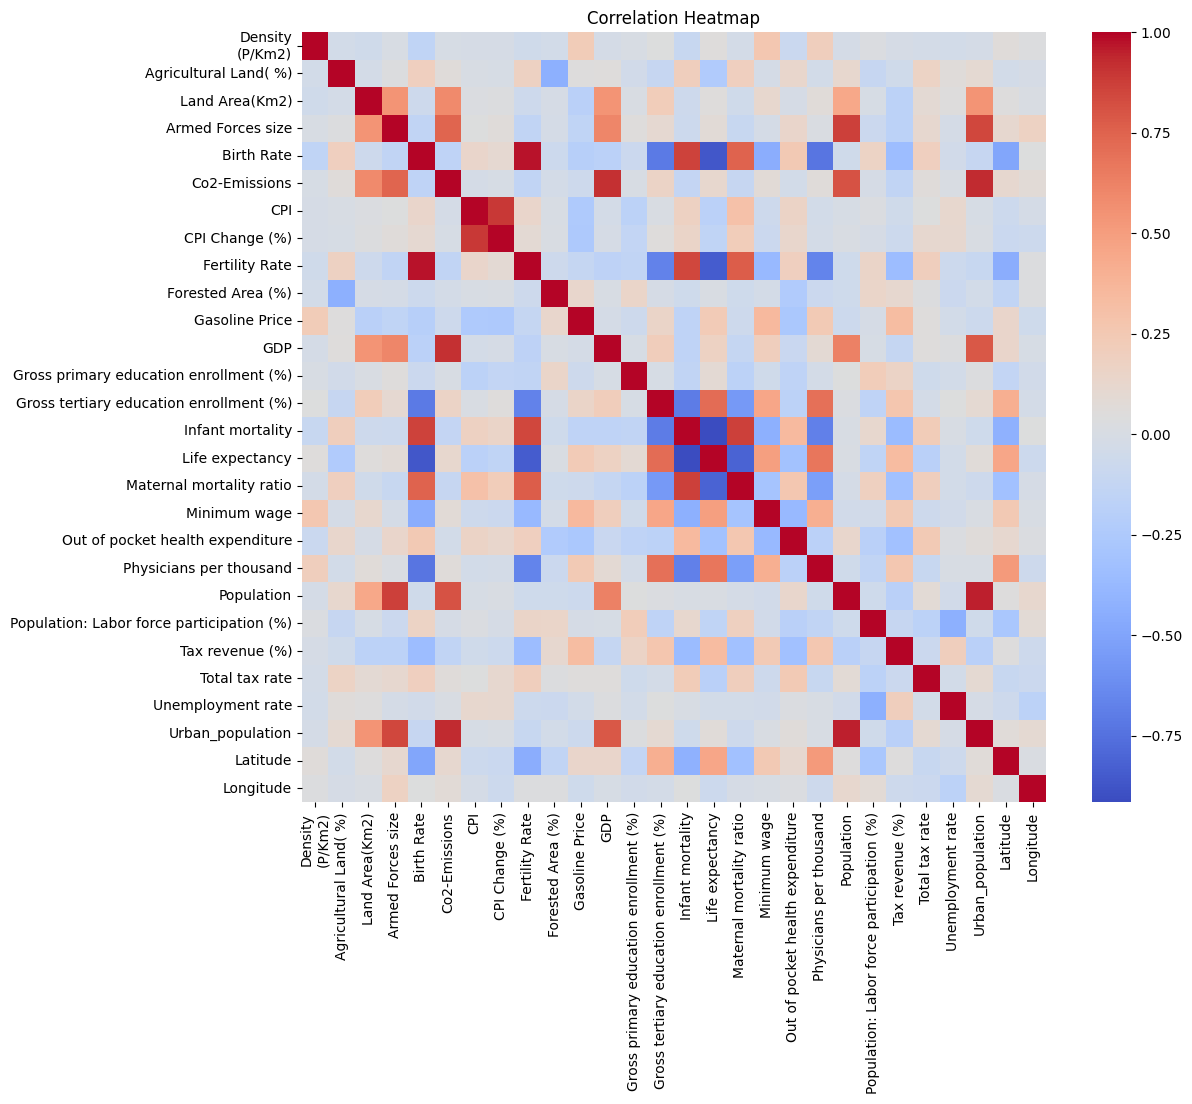

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def select_features_by_correlation(dataframe, target, threshold=0.3):
    numeric_df = dataframe.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()
    high_correlation = correlation_matrix[target][abs(correlation_matrix[target]) > threshold]
    selected_features = high_correlation.index.drop(target).tolist()
    return selected_features

selected_features = select_features_by_correlation(df, 'Life expectancy', 0.3)

X = df[selected_features]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

y_pred = svr_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)

selected_features, rmse

(['Birth Rate',
  'Fertility Rate',
  'Gross tertiary education enrollment (%)',
  'Infant mortality',
  'Maternal mortality ratio',
  'Minimum wage',
  'Out of pocket health expenditure',
  'Physicians per thousand',
  'Tax revenue (%)',
  'Latitude'],
 3.1986843019035316)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error

def train_and_evaluate_svr(X_train, X_test, y_train, y_test, kernels):
    results = {}
    for kernel in kernels:
        svr = SVR(kernel=kernel)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)

        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[kernel] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}
    return results

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

svr_results = train_and_evaluate_svr(X_train_scaled, X_test_scaled, y_train, y_test, kernels)
svr_results

{'linear': {'RMSE': 3.1986843019035316,
  'R2': 0.8200030543229323,
  'MAE': 2.5349298473414623},
 'poly': {'RMSE': 4.110934146951822,
  'R2': 0.7026941754890912,
  'MAE': 2.9405614976249286},
 'rbf': {'RMSE': 3.8321352584666384,
  'R2': 0.7416526347671765,
  'MAE': 2.971153174237652},
 'sigmoid': {'RMSE': 3.965744927486678,
  'R2': 0.7233237169501292,
  'MAE': 3.2818296456616625}}

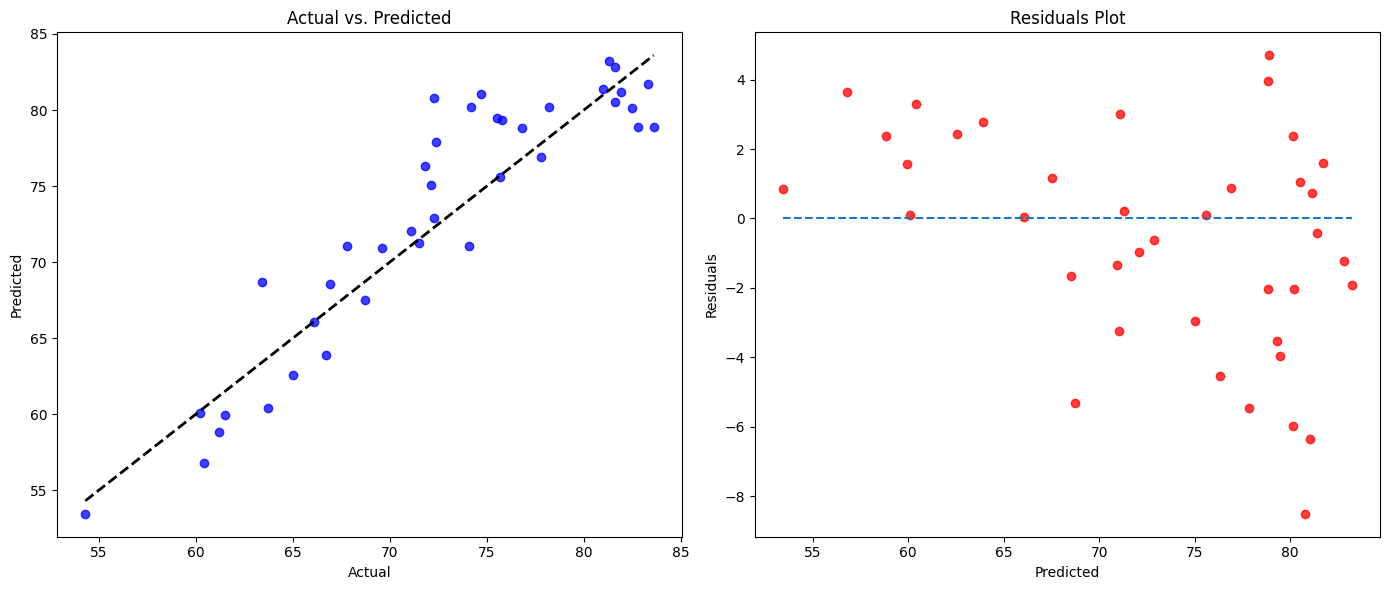

In [13]:
import matplotlib.pyplot as plt

best_svr = SVR(kernel='linear')
best_svr.fit(X_train_scaled, y_train)
y_pred_linear = best_svr.predict(X_test_scaled)

residuals = y_test - y_pred_linear

# Plotting Actual vs. Predicted
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.75, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_linear, residuals, alpha=0.75, color='red')
plt.hlines(y=0, xmin=y_pred_linear.min(), xmax=y_pred_linear.max(), linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

k = 5

# Initialize the Support Vector Regression model with linear kernel
svr_linear = SVR(kernel='linear')

X_scaled = scaler.fit_transform(X)  

scorer_rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
scorer_mae = make_scorer(mean_absolute_error)
scorer_r2 = make_scorer(r2_score)

cv_scores_rmse = cross_val_score(svr_linear, X_scaled, y, cv=k, scoring=scorer_rmse)
cv_scores_mae = cross_val_score(svr_linear, X_scaled, y, cv=k, scoring=scorer_mae)
cv_scores_r2 = cross_val_score(svr_linear, X_scaled, y, cv=k, scoring=scorer_r2)

mean_rmse = cv_scores_rmse.mean()
std_rmse = cv_scores_rmse.std()
mean_mae = cv_scores_mae.mean()
std_mae = cv_scores_mae.std()
mean_r2 = cv_scores_r2.mean()
std_r2 = cv_scores_r2.std()

mean_rmse, std_rmse, mean_mae, std_mae, mean_r2, std_r2

(2.6417923009298088,
 0.42297852712444606,
 2.022813434769561,
 0.3598578888969845,
 0.8611115013396198,
 0.055144431769194494)